In [1]:
import joblib
import os
import numpy as np
import pandas as pd
from src.models.linear_model import LinearModel
from src.models.fnn import VanillaNN
from src.models.lstm import LSTMNN
from src.models.xgb_model import XGBModel
from src.processing_utils.preprocessing import seconds_till_arrival
from src.processing_utils.preprocessing import generate_aux_columns

h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems


Number of GPUs available: 1


Load all models and data

In [2]:
PATH_STD_SCALER_FULL_DIST = os.path.join("..", "..", "trained_models", "scalers", "std_scaler_all_distances.bin")
PATH_MINMAX_SCALER_FULL_DIST = os.path.join("..", "..", "trained_models", "scalers", "minmax_scaler_all_distances_h3.bin")
PATH_STD_SCALER_100km = os.path.join("..", "..", "trained_models", "scalers", "std_scaler_100km.bin")
PATH_MINMAX_SCALER_100km = os.path.join("..", "..", "trained_models", "scalers", "minmax_scaler_100km_h3.bin")
PATH_MODEL =os.path.join("..", "..", "trained_models", "best_models")
PATH_LINEAR_MODEL_FULL_DIST = os.path.join(PATH_MODEL, "polynomial_regression_all_dist_6.sav")
PATH_LINEAR_MODEL_100km = os.path.join(PATH_MODEL, "polynomial_regression_100km_3.sav")
PATH_LINEAR_MODEL_FULL_DIST_REL = os.path.join(PATH_MODEL, "polynomial_regression_all_dist_rel1.sav")
PATH_LINEAR_MODEL_100km_REL = os.path.join(PATH_MODEL, "polynomial_regression_100km_rel1.sav")
PATH_MLP_FULL_DIST = os.path.join(PATH_MODEL, "fnn_full_distance")
PATH_MLP_100km = os.path.join(PATH_MODEL, "fnn_100km")
PATH_LSTM_FULL_DIST = os.path.join(PATH_MODEL, "lstm_full_distance")
PATH_LSTM_100km = os.path.join(PATH_MODEL, "lstm_100km")
PATH_XGB_FULL_DIST = os.path.join(PATH_MODEL, "xgb_full_dist.model")
PATH_XGB_100km = os.path.join(PATH_MODEL, "xgb_100km.model")


COLS_TO_SCALE_STD = ["distance", "altitude", "geoaltitude", "vertical_rate", "groundspeed"]
COLS_TO_SCALE_MINMAX = ["density_10_minutes_past", "density_30_minutes_past", "density_60_minutes_past"]
std_scaler_full_dist = joblib.load(PATH_STD_SCALER_FULL_DIST)
minmax_scaler_full_dist = joblib.load(PATH_MINMAX_SCALER_FULL_DIST)
std_scaler_100km = joblib.load(PATH_STD_SCALER_100km)
minmax_scaler_100km = joblib.load(PATH_MINMAX_SCALER_100km)

In [3]:
DIR_TEST_DATA = os.path.join("..", "..", "data", "final", "test")
FILE_TEST_DATA_FULL = os.path.join(DIR_TEST_DATA,"testdata_2023_comparable.csv")
FILE_TEST_DATA_100km = os.path.join(DIR_TEST_DATA,"testdata_2023_100km_comparable.csv")
FILE_TEST_DATA_LARGE = os.path.join("..", "..", "data", "testdata", "data_2023_10sec_h3.csv")
FILE_TEST_DATA_LSTM_100km = os.path.join(DIR_TEST_DATA, "testdata_2023_100km_comparable_clean.npy")
FEATURES = [
    'distance', 'altitude', 'vertical_rate', 'groundspeed', 'holiday',
    'sec_sin', 'sec_cos', 'day_sin', 'day_cos', 'bearing_sin', 'bearing_cos',
    'track_sin', 'track_cos', 'latitude_rad', 'longitude_rad',
    'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
    'density_10_minutes_past', 'density_30_minutes_past', 'density_60_minutes_past'
]
FEATURES_DL = [
    'distance',
    'altitude',
    'geoaltitude',
    'vertical_rate',
    'groundspeed',
    'holiday',
    'sec_sin',
    'sec_cos',
    'day_sin',
    'day_cos',
    'bearing_sin',
    'bearing_cos',
    'track_sin',
    'track_cos',
    'latitude_rad',
    'longitude_rad',
    'weekday_1',
    'weekday_2',
    'weekday_3',
    'weekday_4',
    'weekday_5',
    'weekday_6',
    "density_10_minutes_past",
    "density_30_minutes_past",
    "density_60_minutes_past",
]
df_test_full = pd.read_csv(FILE_TEST_DATA_FULL, parse_dates=["arrival_time", "timestamp"])
y_test_full = seconds_till_arrival(df_test_full)
df_test_100km = pd.read_csv(FILE_TEST_DATA_100km, parse_dates=["arrival_time", "timestamp"])
y_test_100km = seconds_till_arrival(df_test_100km)
df_test_full_xgb = generate_aux_columns(df_test_full)
df_test_100km_xgb =generate_aux_columns(df_test_100km)
df_test_large = pd.read_csv(FILE_TEST_DATA_LARGE, parse_dates=["arrival_time", "timestamp"]).sample(frac=0.1)
y_test_large = seconds_till_arrival(df_test_large)

In [4]:
linear_model_full = LinearModel(
    std_scaler=std_scaler_full_dist,
    minmax_scaler=minmax_scaler_full_dist,
    features=FEATURES,
    model_file=PATH_LINEAR_MODEL_FULL_DIST,
    pol_degree=6,
    cols_to_scale_std=COLS_TO_SCALE_STD,
    cols_to_scale_minmax=COLS_TO_SCALE_MINMAX
)
linear_model_100km = LinearModel(
    std_scaler=std_scaler_100km,
    minmax_scaler=minmax_scaler_100km,
    features=FEATURES,
    model_file=PATH_LINEAR_MODEL_100km,
    pol_degree=3,
    cols_to_scale_std=COLS_TO_SCALE_STD,
    cols_to_scale_minmax=COLS_TO_SCALE_MINMAX
)
linear_model_full_rel = LinearModel(
    std_scaler=std_scaler_full_dist,
    minmax_scaler=minmax_scaler_full_dist,
    features=FEATURES,
    model_file=PATH_LINEAR_MODEL_FULL_DIST_REL,
    pol_degree=1,
    cols_to_scale_std=COLS_TO_SCALE_STD,
    cols_to_scale_minmax=COLS_TO_SCALE_MINMAX
)
linear_model_100km_rel = LinearModel(
    std_scaler=std_scaler_100km,
    minmax_scaler=minmax_scaler_100km,
    features=FEATURES,
    model_file=PATH_LINEAR_MODEL_100km_REL,
    pol_degree=1,
    cols_to_scale_std=COLS_TO_SCALE_STD,
    cols_to_scale_minmax=COLS_TO_SCALE_MINMAX
)

In [5]:
mlp_full = VanillaNN(
    model_file=PATH_MLP_FULL_DIST,
    features=FEATURES_DL,
    std_scaler=std_scaler_full_dist,
    minmax_scaler=minmax_scaler_full_dist,
    cols_to_scale_std = COLS_TO_SCALE_STD,
    cols_to_scale_minmax = COLS_TO_SCALE_MINMAX,
    distance_relative=True,
)
mlp_100km = VanillaNN(
    model_file=PATH_MLP_100km,
    features=FEATURES_DL,
    std_scaler=std_scaler_100km,
    minmax_scaler=minmax_scaler_100km,
    cols_to_scale_std=COLS_TO_SCALE_STD,
    cols_to_scale_minmax=COLS_TO_SCALE_MINMAX,
    distance_relative=True
)

In [6]:
xgb_full_dist = XGBModel(model_file=PATH_XGB_FULL_DIST)
xgb_100km = XGBModel(model_file=PATH_XGB_100km)

In [7]:
mae_reg_full, r2_reg_full = linear_model_full.evaluate(df_test_full, y_test_full)
print(mae_reg_full, r2_reg_full)

265.9460238872875 0.9958110083518771


In [8]:
mae_reg_100km, r2_reg_100km = linear_model_100km.evaluate(df_test_100km, y_test_100km)
print(mae_reg_100km, r2_reg_100km)

70.92302499478444 0.7951972350673961


In [9]:
mae_reg_full_rel, r2_reg_full_rel = linear_model_full_rel.evaluate(df_test_full, y_test_full/df_test_full.distance)
print(mae_reg_full_rel, r2_reg_full_rel)

2.752382830793185 0.19700878973028624


In [10]:
mae_reg_100km_rel, r2_reg_100km_rel = linear_model_100km_rel.evaluate(df_test_100km, y_test_100km/df_test_100km.distance)
print(mae_reg_100km_rel, r2_reg_100km_rel)

6.319928203504311 0.2677301683517639


In [11]:
mlp_full.evaluate(df_test_full, y_test_full)

3125/3125 [==============================] - 5s 1ms/step
Evaluation Results:
 - Loss (relative to distance): 0.8532
 - Loss (absolute): 220.3844
 - R^2 (relative to distance): 0.4899
 - R^2 (absolute): 0.9963



(0.8531660437583923,
 220.38438460684728,
 0.4898622570900997,
 0.9962669041643459)

In [12]:
mlp_100km.evaluate(df_test_100km, y_test_100km)

3125/3125 [==============================] - 5s 1ms/step
Evaluation Results:
 - Loss (relative to distance): 2.2527
 - Loss (absolute): 42.8237
 - R^2 (relative to distance): 0.4853
 - R^2 (absolute): 0.8793



(2.252709150314331,
 42.823679451666216,
 0.48526663546713955,
 0.8792744532608401)

In [13]:
mae_xgb_full_dist, mae_xgb_full_dist_rel, r2_xgb_full_dist, r2_xgb_full_dist_rel = xgb_full_dist.evaluate(df_test_full_xgb[FEATURES_DL], y_test_full/df_test_full_xgb.distance)
print(f"Mean Absolute Error: {mae_xgb_full_dist}")
print(f"Relative Mean Absolute Error: {mae_xgb_full_dist_rel}")
print(f"R^2 Score: {r2_xgb_full_dist}")
print(f"R^2 Score Relative: {r2_xgb_full_dist_rel}")

[22:59:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

[22:59:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.



Mean Absolute Error: 235.41647209479322
Relative Mean Absolute Error: 1.1359423104207746
R^2 Score: 0.9960082709097814
R^2 Score Relative: 0.4299965176629347


In [14]:
mae_xgb_100km_dist, mae_xgb_100km_rel, r2_xgb_100km, r2_xgb_100km_rel = xgb_100km.evaluate(df_test_100km_xgb[FEATURES_DL], y_test_100km/df_test_100km_xgb.distance)
print(f"Mean Absolute Error: {mae_xgb_100km_dist}")
print(f"Relative Mean Absolute Error: {mae_xgb_100km_rel}")
print(f"R^2 Score: {r2_xgb_100km}")
print(f"R^2 Score Relative: {r2_xgb_100km_rel}")

Mean Absolute Error: 61.97138072238155
Relative Mean Absolute Error: 3.61195175833924
R^2 Score: 0.7622746104810203
R^2 Score Relative: 0.34360806531477395


[22:59:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



In [34]:
for i in range(18000,36000, 3600):

    print(f"{i/60} to {(i+3600)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+3600))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = linear_model_full.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

300.0 to 360.0
n cases 20699
(597.2525149272673, 0.3836268820786213)
360.0 to 420.0
n cases 25165
(702.7212857827941, 0.19967257816072737)
420.0 to 480.0
n cases 15735
(878.0555850158896, -0.16640688983912666)
480.0 to 540.0
n cases 11861
(1025.64574825781, -0.6345618913727749)
540.0 to 600.0
n cases 6476
(1111.0657645468973, -3.104481053444399)


In [35]:
for i in range(18000,36000, 3600):

    print(f"{i/60} to {(i+3600)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+3600))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = mlp_full.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

300.0 to 360.0
n cases 20699
647/647 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 0.1221
 - Loss (absolute): 590.2479
 - R^2 (relative to distance): 0.8555
 - R^2 (absolute): 0.3841

(0.12211378663778305, 590.2478582427899, 0.8555094393505915, 0.38405145656978534)
360.0 to 420.0
n cases 25165
787/787 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 0.1224
 - Loss (absolute): 700.0926
 - R^2 (relative to distance): 0.7506
 - R^2 (absolute): 0.2300

(0.1223861575126648, 700.0925585696122, 0.7506085884300704, 0.23003063826707626)
420.0 to 480.0
n cases 15735
492/492 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 0.1161
 - Loss (absolute): 772.8257
 - R^2 (relative to distance): 0.5596
 - R^2 (absolute): 0.0762

(0.11606386303901672, 772.8257146648945, 0.5595878799628359, 0.07624976470871714)
480.0 to 540.0
n cases 11861
371/371 [======

In [43]:
for i in range(0,600, 120):

    print(f"{i/60} to {(i+120)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+120))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = linear_model_full.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

0.0 to 2.0
n cases 21580
(144.57783208021127, -23.502977388352253)
2.0 to 4.0
n cases 22055
(134.50633828678963, -19.312824189909865)
4.0 to 6.0
n cases 21882
(145.60931328196008, -25.076323613033328)
6.0 to 8.0
n cases 21622
(150.64315885201117, -28.56203110803616)
8.0 to 10.0
n cases 22013
(154.25425663002395, -31.182954925384415)


In [44]:
for i in range(0,600, 120):

    print(f"{i/60} to {(i+120)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+120))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = mlp_full.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

0.0 to 2.0
n cases 21580
675/675 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 2.0125
 - Loss (absolute): 8.7709
 - R^2 (relative to distance): 0.6821
 - R^2 (absolute): 0.8463

(2.012455940246582, 8.770894769825764, 0.6821296620722714, 0.8463176087726574)
2.0 to 4.0
n cases 22055
690/690 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 1.0019
 - Loss (absolute): 11.7239
 - R^2 (relative to distance): 0.5223
 - R^2 (absolute): 0.7472

(1.0018953084945679, 11.723943720985424, 0.5223494983138925, 0.7472220850120207)
4.0 to 6.0
n cases 21882
684/684 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 0.6973
 - Loss (absolute): 16.2799
 - R^2 (relative to distance): 0.4791
 - R^2 (absolute): -4.3545

(0.6972761154174805, 16.27994354103422, 0.4790745146083216, -4.354491045611886)
6.0 to 8.0
n cases 21622
676/676 [==============================

In [45]:
for i in range(600,1200, 300):

    print(f"{i/60} to {(i+300)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+300))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = linear_model_full.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

10.0 to 15.0
n cases 54115
(163.56340211100397, -4.939848082511264)
15.0 to 20.0
n cases 54200
(219.02781687644318, -8.435362663563627)


In [46]:
for i in range(600,1200, 300):

    print(f"{i/60} to {(i+300)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+300))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = mlp_full.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

10.0 to 15.0
n cases 54115
1692/1692 [==============================] - 4s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 3.2512
 - Loss (absolute): 90.2955
 - R^2 (relative to distance): 0.3886
 - R^2 (absolute): -1.7945

(3.2511954307556152, 90.29546076851972, 0.3885950224432462, -1.7944627519580294)
15.0 to 20.0
n cases 54200
1694/1694 [==============================] - 3s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 2.7058
 - Loss (absolute): 119.9085
 - R^2 (relative to distance): 0.2820
 - R^2 (absolute): -3.1650

(2.7057979106903076, 119.90852780044705, 0.2819710538374435, -3.1650415625172714)


In [47]:
for i in range(0,600, 120):

    print(f"{i/60} to {(i+120)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+120))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = linear_model_100km.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

0.0 to 2.0
n cases 21580
(39.31008886336474, -3.1797626165233037)
2.0 to 4.0
n cases 22055
(25.081700212845245, 0.1335909477326901)
4.0 to 6.0
n cases 21882
(70.4414207398761, -1505.9194454695557)
6.0 to 8.0
n cases 21622
(77.22230087535118, -1159.4015605197872)
8.0 to 10.0
n cases 22013
(94.48059936375692, -960.1439697900905)


In [48]:
for i in range(600,1200, 300):

    print(f"{i/60} to {(i+300)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+300))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = linear_model_100km.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

10.0 to 15.0
n cases 54115
(272.2325628524685, -97216.41829595962)
15.0 to 20.0
n cases 54200
(348.4530706919599, -139000.10101529752)


In [49]:
for i in range(0,600, 120):

    print(f"{i/60} to {(i+120)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+120))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = mlp_100km.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

0.0 to 2.0
n cases 21580
675/675 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 2.0165
 - Loss (absolute): 8.8862
 - R^2 (relative to distance): -3.4462
 - R^2 (absolute): 0.7397

(2.0165181159973145, 8.886181818862436, -3.446195392564314, 0.7397341401544877)
2.0 to 4.0
n cases 22055
690/690 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 1.1665
 - Loss (absolute): 11.9882
 - R^2 (relative to distance): -15.9172
 - R^2 (absolute): 0.5831

(1.166530966758728, 11.988226350700026, -15.91716810078064, 0.5831129578689465)
4.0 to 6.0
n cases 21882
684/684 [==============================] - 1s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 0.8652
 - Loss (absolute): 22.2971
 - R^2 (relative to distance): -12.7244
 - R^2 (absolute): -143.7338

(0.8652054667472839, 22.297098855594367, -12.72435135629994, -143.73384020694064)
6.0 to 8.0
n cases 21622
676/676 [=====================

In [50]:
for i in range(600,1200, 300):

    print(f"{i/60} to {(i+300)/60}")
    cases = (y_test_large>=i) & (y_test_large<=(i+300))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = mlp_100km.evaluate(df_test_large[cases], y_test_large[cases])
    print(metrics)

10.0 to 15.0
n cases 54115
1692/1692 [==============================] - 4s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 2.8666
 - Loss (absolute): 94.1070
 - R^2 (relative to distance): 0.4203
 - R^2 (absolute): -424.9796

(2.8665661811828613, 94.10695557155961, 0.42034136579996173, -424.97957793177295)
15.0 to 20.0
n cases 54200
1694/1694 [==============================] - 3s 2ms/step
Evaluation Results:
 - Loss (relative to distance): 2.3923
 - Loss (absolute): 143.1031
 - R^2 (relative to distance): 0.6756
 - R^2 (absolute): -543.0334

(2.3922860622406006, 143.10311922798218, 0.6755759522350919, -543.0334205049842)


In [15]:
data_lstm_100km = np.load(FILE_TEST_DATA_LSTM_100km)
X_test_lstm = data_lstm_100km[:, :, :-1]
y_test_lstm = data_lstm_100km[:, -1, -1]
print("shape test", X_test_lstm.shape)


shape test (100000, 40, 27)


In [16]:
n_features = X_test_lstm.shape[2]
lstm_100km = LSTMNN(
    scaler=std_scaler_100km,
    distance_relative=True,
    index_distance=0,
    n_features=n_features,
    lr=0.0001,
    lstm_layers=(813, 281),
    dense_layers=(1425, 4096, 588),
    dropout_rate_fc=0.2,
    dropout_rate_lstm= 0.1235,
    model_file = PATH_LSTM_100km
)

In [17]:
lstm_100km.evaluate(X_test_lstm, y_test_lstm)

3125/3125 [==============================] - 24s 7ms/step
Evaluation Results:
 - Loss (relative to distance): 2.3339
 - Loss (absolute): 44.4152
 - R2 (relative to distance): 0.4341
 - R2 (absolute): 0.8820



(2.333946466445923, 44.41522283589065, 0.43407804413802586, 0.881955142443966)

In [74]:
distances = std_scaler_100km.inverse_transform(X_test_lstm[:, -1, :5])[:,0]
seconds = y_test_lstm*distances
for i in range(0,600, 120):

    print(f"{i/60} to {(i+120)/60}")
    cases = (seconds>=i) & (seconds<=(i+120))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = lstm_100km.evaluate(X_test_lstm[cases], y_test_lstm[cases])
    print(metrics)

0.0 to 2.0
n cases 14654
458/458 [==============================] - 5s 7ms/step
Evaluation Results:
 - Loss (relative to distance): 2.0190
 - Loss (absolute): 9.3796

(2.0189826488494873, 9.379560605951022)
2.0 to 4.0
n cases 14934
467/467 [==============================] - 3s 7ms/step
Evaluation Results:
 - Loss (relative to distance): 1.0315
 - Loss (absolute): 11.8580

(1.0314866304397583, 11.857980234408606)
4.0 to 6.0
n cases 15052
471/471 [==============================] - 3s 7ms/step
Evaluation Results:
 - Loss (relative to distance): 0.6908
 - Loss (absolute): 15.7738

(0.6908015608787537, 15.773752569127101)
6.0 to 8.0
n cases 15044
471/471 [==============================] - 3s 7ms/step
Evaluation Results:
 - Loss (relative to distance): 0.8460
 - Loss (absolute): 26.9941

(0.845952033996582, 26.99413345322804)
8.0 to 10.0
n cases 13239
414/414 [==============================] - 3s 7ms/step
Evaluation Results:
 - Loss (relative to distance): 1.5866
 - Loss (absolute): 44.8585


In [75]:
for i in range(600,1200, 300):

    print(f"{i/60} to {(i+300)/60}")
    cases = (seconds>=i) & (seconds<=(i+300))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = lstm_100km.evaluate(X_test_lstm[cases], y_test_lstm[cases])
    print(metrics)

10.0 to 15.0
n cases 21715
679/679 [==============================] - 5s 7ms/step
Evaluation Results:
 - Loss (relative to distance): 3.9377
 - Loss (absolute): 76.4971

(3.9376814365386963, 76.49714976194913)
15.0 to 20.0
n cases 5109
160/160 [==============================] - 1s 7ms/step
Evaluation Results:
 - Loss (relative to distance): 8.5530
 - Loss (absolute): 153.0603

(8.552977561950684, 153.06025647922993)


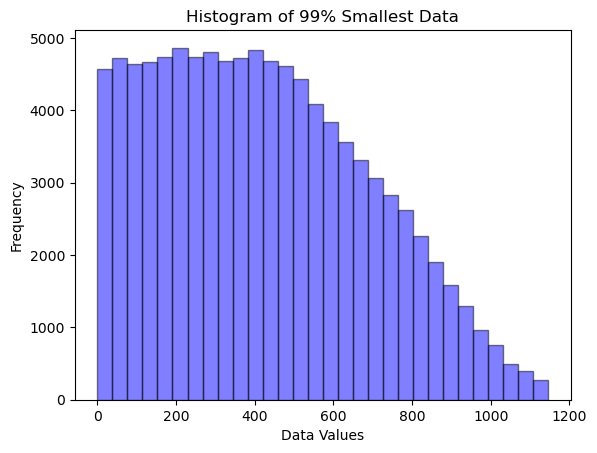

In [73]:
# Calculate the 99th percentile
p99 = np.percentile(seconds, 99)

# Filter the data to include only the 99% smallest values
filtered_data = seconds[seconds < p99]

# Create a histogram of the filtered data
plt.hist(filtered_data, bins=30, alpha=0.5, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Histogram of 99% Smallest Data')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

XGBoost full dist

In [106]:
df_test_large_xgb = generate_aux_columns(df_test_large)[FEATURES_DL]
seconds_xgb = y_test_large.reset_index(drop=True)
y_test_large_xgb = seconds_xgb/df_test_large_xgb.distance
for i in range(0,600, 120):

    print(f"{i/60} to {(i+120)/60}")
    cases = (seconds_xgb>=i) & (seconds_xgb<=(i+120))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = xgb_full_dist.evaluate(df_test_large_xgb[cases].reset_index(drop=True), y_test_large_xgb[cases].reset_index(drop=True))
    print(metrics)

0.0 to 2.0
n cases 21263
(10.073809312194857, 2.448253333333778, 0.8391004124305129, 0.6580205319937753)
2.0 to 4.0
n cases 22050
(11.680575302497477, 1.015426762196611, 0.7290696989662436, 0.49504331813809355)
4.0 to 6.0
n cases 21805
(18.168239021845807, 0.7782447275499428, -3.8524790318094784, 0.15259313317199452)
6.0 to 8.0
n cases 21819
(37.26721629709505, 1.1187082549727392, -4.01845290794238, 0.02460180915655452)
8.0 to 10.0
n cases 21671
(67.53023295340107, 1.9988558955746443, -7.556613427647063, 0.8360897907107947)


In [107]:
for i in range(600,1200, 300):

    print(f"{i/60} to {(i+300)/60}")
    cases = (seconds_xgb>=i) & (seconds_xgb<=(i+300))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = xgb_full_dist.evaluate(df_test_large_xgb[cases].reset_index(drop=True), y_test_large_xgb[cases].reset_index(drop=True))
    print(metrics)

10.0 to 15.0
n cases 54228
(126.72799450851686, 5.738473675268555, -3.14223780040533, 0.36999267827341276)
15.0 to 20.0
n cases 54376
(151.67703776166363, 3.666375013235039, -4.102009293944018, 0.2234903545182898)


In [108]:
for i in range(1200,7200, 600):

    print(f"{i/60} to {(i+600)/60}")
    cases = (seconds_xgb>=i) & (seconds_xgb<=(i+600))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = xgb_full_dist.evaluate(df_test_large_xgb[cases].reset_index(drop=True), y_test_large_xgb[cases].reset_index(drop=True))
    print(metrics)

20.0 to 30.0
n cases 107657
(170.10170088318193, 1.4041069571411704, -0.5332531864653627, 0.5438205778707359)
30.0 to 40.0
n cases 102705
(171.3981213524648, 0.7061439344536665, -0.7042596583583478, 0.4863284682386696)
40.0 to 50.0
n cases 90671
(178.28365304913373, 0.49006541289097677, -0.8930053696965272, 0.20113832185688585)
50.0 to 60.0
n cases 77567
(190.83038936573422, 0.5059503214546881, -1.189152015187564, 0.001517166792185165)
60.0 to 70.0
n cases 67742
(204.4354478725441, 0.3401895428278014, -1.5212768248037905, 0.07806021051972045)
70.0 to 80.0
n cases 58424
(212.08657138164529, 0.27326837780326185, -1.750332821063906, 0.3945163029311788)
80.0 to 90.0
n cases 51204
(220.88120807635684, 0.37260385473581364, -1.9773644746239452, 0.004300919753420951)
90.0 to 100.0
n cases 42837
(233.32581081679035, 0.27216028139860565, -2.524573063655576, 0.08796090756576103)
100.0 to 110.0
n cases 35545
(250.17449131834167, 0.2506435910023136, -3.1029178164852667, 0.14284975980763737)
110.0 t

In [109]:
for i in range(7200, 18000, 1800):

    print(f"{i/60} to {(i+1800)/60}")
    cases = (seconds_xgb>=i) & (seconds_xgb<=(i+1800))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = xgb_full_dist.evaluate(df_test_large_xgb[cases].reset_index(drop=True), y_test_large_xgb[cases].reset_index(drop=True))
    print(metrics)

120.0 to 150.0
n cases 48795
(350.74900336148585, 0.2239153147037408, 0.10931475733143492, 0.3423887266726193)
150.0 to 180.0
n cases 23547
(392.13809582769295, 1.5421761837882115, -0.12866636340100013, 0.001973237700862218)
180.0 to 210.0
n cases 10437
(437.6388191682984, 0.18781058044160207, -0.14793117741876882, 0.34527389267488806)
210.0 to 240.0
n cases 7586
(425.60527529546295, 0.15879922000841495, -0.18162365840651473, 0.27637654252932564)
240.0 to 270.0
n cases 1832
(653.1285529035666, 0.22762977769717999, -2.719788494554726, -0.9348862102025006)
270.0 to 300.0
n cases 1463
(916.7656722226914, 0.23339447671331842, -4.951396452622279, 0.7178029299119393)


In [110]:
for i in range(18000, 36000, 3600):

    print(f"{i/60} to {(i+3600)/60}")
    cases = (seconds_xgb>=i) & (seconds_xgb<=(i+3600))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = xgb_full_dist.evaluate(df_test_large_xgb[cases].reset_index(drop=True), y_test_large_xgb[cases].reset_index(drop=True))
    print(metrics)

300.0 to 360.0
n cases 20765
(647.0058673839844, 0.13371474571533098, 0.28052587277595153, 0.8274788428925732)
360.0 to 420.0
n cases 25021
(804.8343002197746, 0.14179213021175993, -0.011167242017557255, 0.6710338290945017)
420.0 to 480.0
n cases 15595
(916.870873338664, 0.13843801225706084, -0.23795019874403156, 0.42576817724926386)
480.0 to 540.0
n cases 11863
(930.0997040808003, 0.1255729214504424, -0.24057484546861274, 0.717565338191881)
540.0 to 600.0
n cases 6397
(1003.512503598931, 0.12369332909583847, -0.6556212842951497, 0.7172299536225115)


In [18]:
df_test_large_xgb = generate_aux_columns(df_test_large)[FEATURES_DL]
seconds_xgb = y_test_large.reset_index(drop=True)
y_test_large_xgb = seconds_xgb/df_test_large_xgb.distance
for i in range(0,600, 120):

    print(f"{i/60} to {(i+120)/60}")
    cases = (seconds_xgb>=i) & (seconds_xgb<=(i+120))
    if cases.sum() <50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = xgb_100km.evaluate(df_test_large_xgb[cases].reset_index(drop=True), y_test_large_xgb[cases].reset_index(drop=True))
    print(metrics)

0.0 to 2.0
n cases 21328
(14.73197192133393, 3.1364996671921954, -6.169706278544011, 0.49571220873066724)
2.0 to 4.0
n cases 21817
(12.870829591851583, 0.9959205752891318, -11.830554877602717, 0.5005734484491269)
4.0 to 6.0
n cases 22123
(19.761773053551522, 0.7897187231860205, -24.899409696476607, 0.19379181510098942)
6.0 to 8.0
n cases 21993
(34.86251848781307, 1.0255805280968482, -19.97794865720137, 0.072343824826273)
8.0 to 10.0
n cases 21755
(65.22046318981042, 1.932983039594699, -10.03358658918363, 0.8280079898816832)


In [20]:

for i in range(600, 1200, 300):

    print(f"{i / 60} to {(i + 300) / 60}")
    cases = (seconds_xgb >= i) & (seconds_xgb <= (i + 300))
    if cases.sum() < 50:
        continue
    print(f"n cases {cases.sum()}")
    metrics = xgb_100km.evaluate(df_test_large_xgb[cases].reset_index(drop=True),
                                     y_test_large_xgb[cases].reset_index(drop=True))
    print(metrics)

10.0 to 15.0
n cases 54661
(135.13752683696063, 5.088571878149758, -10.568248368384006, 0.5220097491513518)
15.0 to 20.0
n cases 53928
(278.53511962217914, 4.571627344108339, -33.568825910914576, 0.14406274438835975)
